# Отчет №2 по курсу «Компьютерные методы в биологии клетки»
### Выполнил: Микушин Павел, 403 группа

## Регуляция метаболизма cGMP в фоторецепторах жабы 

Определим метаболические события, сопровождающие реакции фотовозбуждения. В первом приближении эти реакции можно описать схемой, предложенной в статье [1].

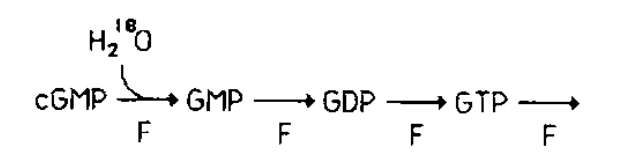

В рамках этой работы использовались следующие обозначения:

M - концентрация ($pmol*mg protein^{-1}$) GMP в пуле метаболитов,

D - концентрация ($pmol*mg protein^{-1}$) GDP в пуле метаболитов,

T - концентрация ($pmol*mg protein^{-1}$) GTP в пуле метаболитов,

f_M - доля М, помеченная одним атомом $^{18}O$ через время t, 

f_D - доля D, помеченная одним атомом $^{18}O$ через время t,

f_T - доля T, помеченная одним атомом $^{18}O$ через время t, 

w - доля H20, помеченная одним атомом $^{18}O$,

F - установившийся поток вещества через систему $(pmol*mg protein^{-1}*s^{-1})$.

Таким образом, по закону действующих масс мы можем, используя введенные выше обозначения, записать следующую систему уравнений:

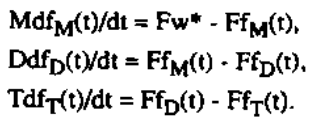

Введя еще одни вспомогательные обозначения, придём к системе уравнений следующего вида:


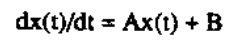

Вспомогательные обозначения:

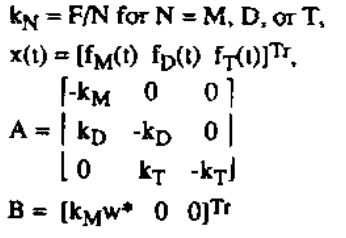

### Исследование модели

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [5]:
# chemical reactions parameters
kM = 2
kD = 4
kT = 8
w = 0.453

# time
t_max = 5

# initial conditions
X0 = 0, 0, 0

In [6]:
def derivatives(t, X):
    A = np.array([[-kM, 0, 0],
                  [kD, -kD, 0],
                  [0, kT, -kT]])
    B = np.array([kM*w, 0, 0])
    return A.dot(X) + B

solution = solve_ivp(derivatives, 
                     (0, t_max), X0, 
                     method='Radau', 
                     # Implicit Runge-Kutta method 
                     # of Radau IIA family of order 5
                     max_step=0.01)
print(solution)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 3516
     njev: 1
      nlu: 1004
      sol: None
   status: 0
  success: True
        t: array([0.0000e+00, 1.0000e-04, 1.1000e-03, 1.1100e-02, 2.1100e-02,
       3.1100e-02, 4.1100e-02, 5.1100e-02, 6.1100e-02, 7.1100e-02,
       8.1100e-02, 9.1100e-02, 1.0110e-01, 1.1110e-01, 1.2110e-01,
       1.3110e-01, 1.4110e-01, 1.5110e-01, 1.6110e-01, 1.7110e-01,
       1.8110e-01, 1.9110e-01, 2.0110e-01, 2.1110e-01, 2.2110e-01,
       2.3110e-01, 2.4110e-01, 2.5110e-01, 2.6110e-01, 2.7110e-01,
       2.8110e-01, 2.9110e-01, 3.0110e-01, 3.1110e-01, 3.2110e-01,
       3.3110e-01, 3.4110e-01, 3.5110e-01, 3.6110e-01, 3.7110e-01,
       3.8110e-01, 3.9110e-01, 4.0110e-01, 4.1110e-01, 4.2110e-01,
       4.3110e-01, 4.4110e-01, 4.5110e-01, 4.6110e-01, 4.7110e-01,
       4.8110e-01, 4.9110e-01, 5.0110e-01, 5.1110e-01, 5.2110e-01,
       5.3110e-01, 5.4110e-01, 5.5110e-01, 5.6110e-01, 5.7110e-01,
       5.8110

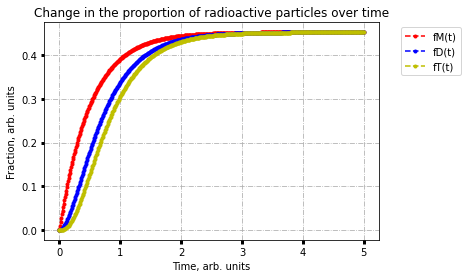

In [7]:
fig, ax = plt.subplots()

plt.plot(solution.t, solution.y[0], 
         marker='o', ms=3,
         label='fM(t)', 
         color="r", linestyle='--')

plt.plot(solution.t, solution.y[1], 
         marker='o', ms=3,
         label='fD(t)',
         color="b", linestyle='--')


plt.plot(solution.t, solution.y[2], 
         marker='o', ms=3,
         label='fT(t)',
         color="y", linestyle='--')


plt.ticklabel_format(axis="y", style="sci")
plt.xlabel('Time, arb. units')
plt.ylabel('Fraction, arb. units')

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='black', labelsize='medium', width=3)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Сhange in the proportion of radioactive particles over time')

plt.show()

## Выводы

Было показано, что при установившемся стационарном потоке веществ, соответствующие доли радиоактивных изотопов, участвующих в реакциях, на больших временах также становятся стационарными и равными доле радиоактивных изотопов в воде.

Также результаты численного моделирования на качественном уровне согласованы с результатами работы [1] (fM > fD > fT). Причем соответствующие кривые имеют ту же форму, что и найденные аналитически, что верифицирует полученный результат.


### Список литературы
1. **Stevan M. Dawis, Richard M. Graeff, Richard A. Heyman, Timothy F. Walseth, and Nelson D. Goldberg**, «Regulation of Cyclic GMP Metabolism in Toad Photoreceptors», THE JOURNAL OF BIOLOGICAL CHEMISTRY, -1988.

## Дополнение


При помощи программы COPASI была произведена аппроксимация параметров системы дифференциальных уравнений. Полученный график соответствует качественному виду аналитического и численного решений, но несколько отличается от экспериментальных данных т.к. в модели не учтены зависимости от интенсивности излучения (простейший случай). Ниже приведены соответствующие результаты для доли радиоактивных изотопов веществ (растяжение экспериментального графика по OY).

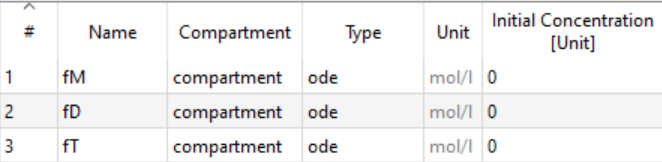

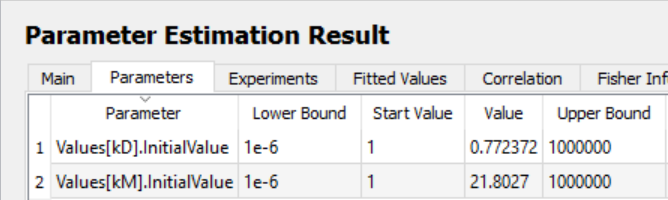

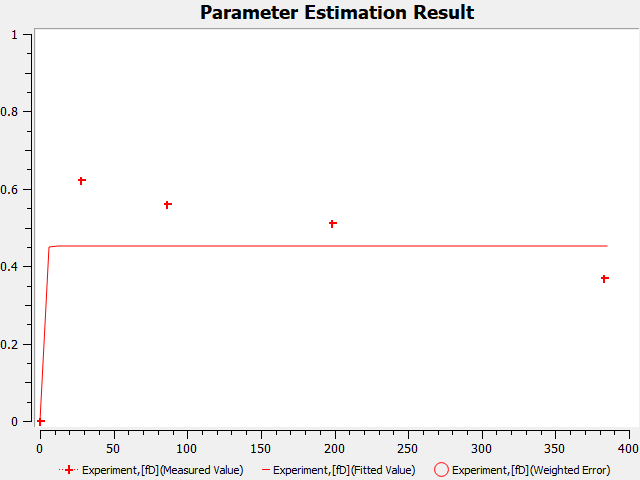

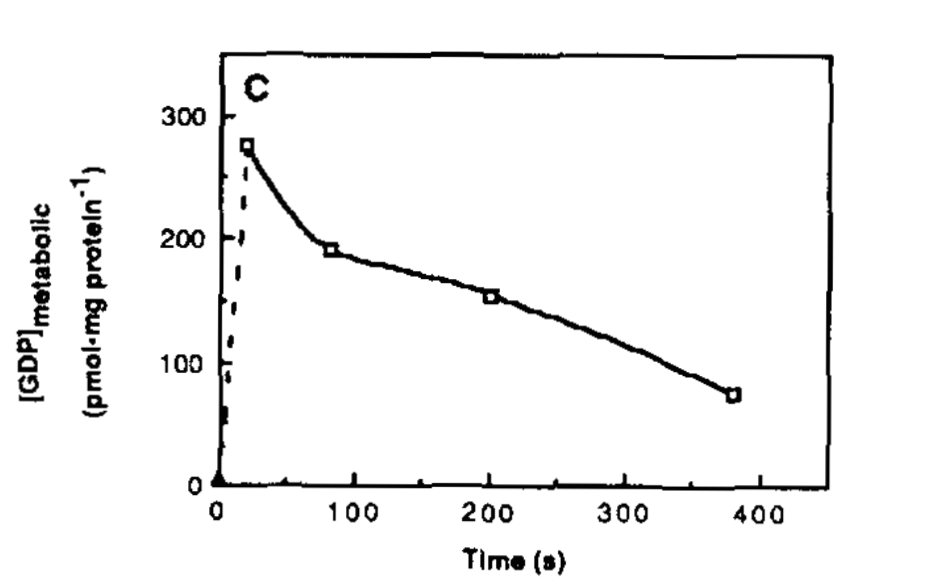